In [88]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
%matplotlib inline

In [89]:

a=-2
b=1
x=np.linspace(0,20)
y = a * x + b

In [90]:
print(len(x) , len(y))

50 50


In [91]:
plt.style.use('ggplot')


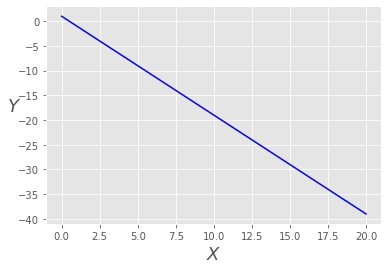

In [92]:
plt.plot(x , y , 'b')
plt.xlabel("$X$" ,fontsize=18)
plt.ylabel("$Y$", rotation = 0 ,fontsize=18)
plt.show();


# ADAGRAD

In [94]:
def adagrad (x,y,alpha,epslon,max_iteration):
    theta0=0
    theta1=0
    v0=0
    v1=0
    m=len(y)
    theta0_all=[]
    theta1_all=[]
    allhypothes = []
    loss=[]
    for i in range (max_iteration):
        h = theta0 + theta1 *x
        allhypothes.append(h)
#         cost = (1/(2*m)) *np.sum((h-y)**2)
        cost = (1/(2*m)) *np.sum(np.square(h-y))
        loss.append(cost)
        
        theta0_all.append(theta0)
        theta1_all.append(theta1)
        gradient_theta0 = (1/m) *np.sum(h-y)
        gradient_theta1 = (1/m) *np.sum((h-y)*x)
        v0 = v0 + (gradient_theta0**2)
        v1 = v1 + (gradient_theta1**2)
        theta0 =theta0 - (alpha  /  np.sqrt(v0) +epslon) * gradient_theta0
        theta1 =theta1- (alpha  /   np.sqrt(v1) +epslon) * gradient_theta1
        
        if cost < 0.1 :
            print(f"  it tooks  {i+1} iterations ")
            break
    return       theta0 ,theta1 ,theta0_all ,theta1_all ,allhypothes,h ,loss 
   
        
    

In [95]:
theta0 ,theta1 ,theta0_all ,theta1_all ,allhypothes,h ,loss = adagrad (x,y,.9,1e-8,1000)

  it tooks  121 iterations 


In [96]:
print(len(x))

50


In [97]:
r2 = r2_score(h , y)
print(r2)

0.9984644291717809


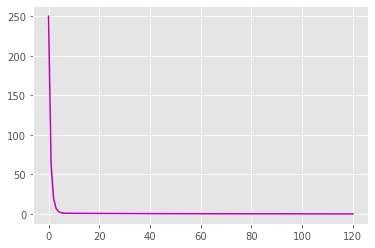

In [98]:
plt.plot(loss , "m")
plt.show();

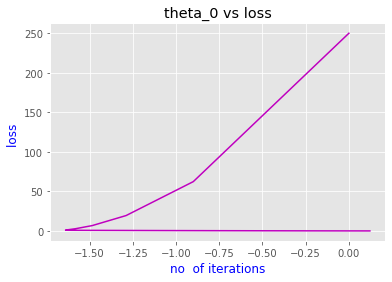

In [11]:
plt.plot(theta0_all ,loss , c='m')
plt.xlabel("no  of iterations" , c='b')
plt.ylabel("loss " , c = 'b')
plt.title("theta_0 vs loss")
plt.show();

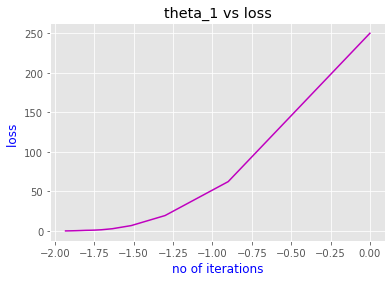

In [12]:
plt.plot(theta1_all ,loss , c='m')
plt.xlabel("no of iterations" , c='b')
plt.ylabel("loss " , c = 'b')
plt.title("theta_1 vs loss")
plt.show();

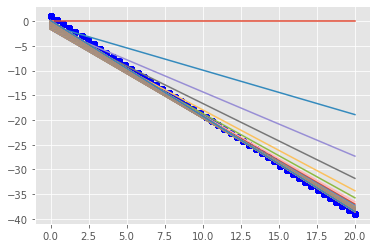

In [13]:
for i in range(len(allhypothes)):
    plt.plot(x,allhypothes[i])
    plt.scatter(x,y,c='b')
plt.show();

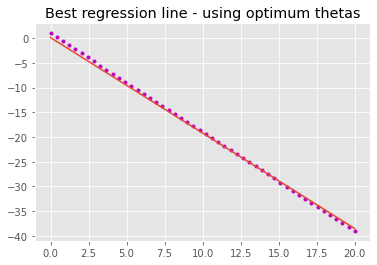

In [14]:
plt.plot(x,y,'m.')
plt.plot(x,h)
plt.title('Best regression line - using optimum thetas')
plt.show();

In [15]:
theta0 ,theta1 ,theta0_all ,theta1_all ,allhypothes,h ,loss = adagrad (x,y,.5,1e-8,1000)

  it tooks  287 iterations 


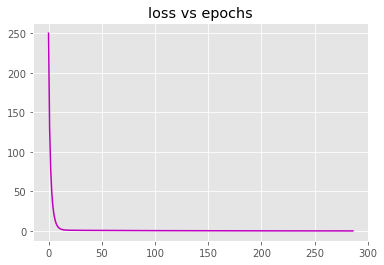

In [16]:
plt.plot(loss , c='m')
plt.title("loss vs epochs")
plt.show();

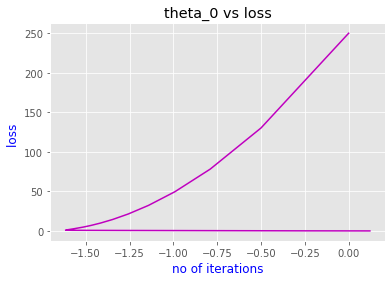

In [17]:
plt.plot(theta0_all ,loss , c='m')
plt.xlabel("no of iterations" , c='b')
plt.ylabel("loss " , c = 'b')
plt.title("theta_0 vs loss")
plt.show();

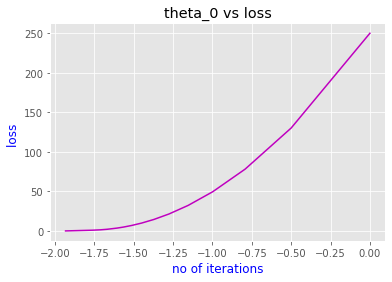

In [18]:
plt.plot(theta1_all ,loss , c='m')
plt.xlabel("no of iterations" , c='b')
plt.ylabel("loss " , c = 'b')
plt.title("theta_0 vs loss")
plt.show();

# RMS

In [19]:
def RMS (x,y,alpha,epslon,max_iteration ,beta):
    theta0=0
    theta1=0
    v0=0
    v1=0
    m=len(y)
    theta0_all=[]
    theta1_all=[]
    allhypothes = []
    loss=[]
    for i in range (max_iteration):
        h = theta0 + theta1 *x
        allhypothes.append(h)
        cost = (1/(2*m)) *np.sum((h-y)**2)
        loss.append(cost)
        
        theta0_all.append(theta0)
        theta1_all.append(theta1)
        gradient_theta0 = (1/m) *np.sum(h-y)
        gradient_theta1 = (1/m) *np.sum((h-y)*x)
        v0 =  beta * v0 + (1-beta) *(gradient_theta0**2)
        v1 =  beta * v1 + (1-beta) *(gradient_theta1**2)
        theta0 =theta0 - (alpha  /  (np.sqrt(v0) +epslon) * gradient_theta0)
        theta1 =theta1-  (alpha  /  (np.sqrt(v1) +epslon) * gradient_theta1)
        
        if (gradient_theta0**2 + gradient_theta1**2 )**0.5 < 0.1 :
            print(f"  it tooks  {i+1} iterations ")
            break
    return  theta0 ,theta1 ,theta0_all ,theta1_all ,allhypothes,h ,loss ,beta
    
        

In [20]:
theta0 ,theta1 ,theta0_all ,theta1_all ,allhypothes,h ,loss ,beta =  RMS (x,y,0.25,1e-8,1000,.9)
print("____________________")
print(allhypothes[-1])
print("____________________")
print(y)

  it tooks  55 iterations 
____________________
[  0.73107391  -0.0769151   -0.88490411  -1.69289312  -2.50088212
  -3.30887113  -4.11686014  -4.92484915  -5.73283816  -6.54082717
  -7.34881618  -8.15680519  -8.9647942   -9.7727832  -10.58077221
 -11.38876122 -12.19675023 -13.00473924 -13.81272825 -14.62071726
 -15.42870627 -16.23669527 -17.04468428 -17.85267329 -18.6606623
 -19.46865131 -20.27664032 -21.08462933 -21.89261834 -22.70060735
 -23.50859635 -24.31658536 -25.12457437 -25.93256338 -26.74055239
 -27.5485414  -28.35653041 -29.16451942 -29.97250842 -30.78049743
 -31.58848644 -32.39647545 -33.20446446 -34.01245347 -34.82044248
 -35.62843149 -36.4364205  -37.2444095  -38.05239851 -38.86038752]
____________________
[  1.           0.18367347  -0.63265306  -1.44897959  -2.26530612
  -3.08163265  -3.89795918  -4.71428571  -5.53061224  -6.34693878
  -7.16326531  -7.97959184  -8.79591837  -9.6122449  -10.42857143
 -11.24489796 -12.06122449 -12.87755102 -13.69387755 -14.51020408
 -15.32

In [21]:
r2 = r2_score( h,y)
print(r2)

0.9998627721109059


Text(0.5, 1.0, 'theta_0 vs loss')

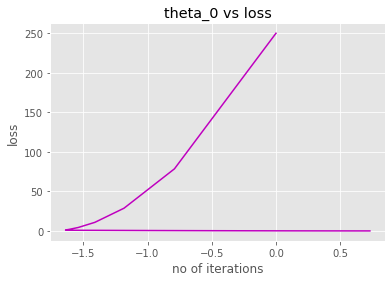

In [22]:
plt.plot(theta0_all, loss ,  'm')
plt.xlabel("no of iterations")
plt.ylabel("loss")
plt.title("theta_0 vs loss")

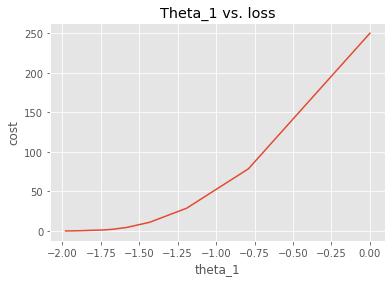

In [23]:
plt.plot(theta1_all, loss)
plt.xlabel('theta_1')
plt.ylabel('cost')
plt.title('Theta_1 vs. loss')
plt.show();

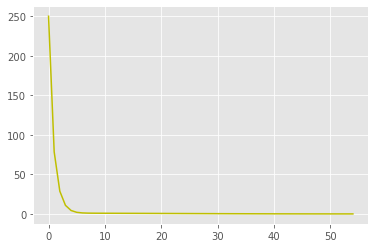

In [24]:
plt.plot(loss , c = "y")
plt.show();

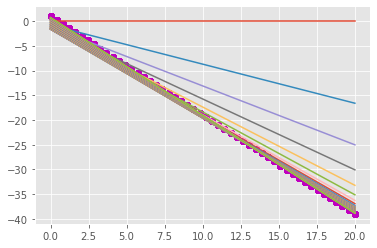

In [25]:
for i in range (len(allhypothes)):
    plt.plot(x,allhypothes[i])
    plt.scatter(x,y ,c ='m')
plt.show();    

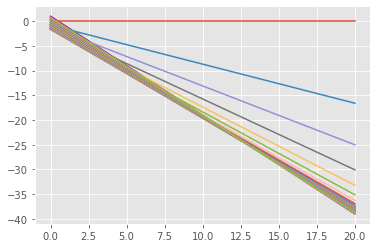

In [26]:
plt.plot(x,y,'m')
for i in allhypothes :
    plt.plot(x,i)
plt.show();

Text(0.5, 1.0, 'Best regression line - using optimum thetas ')

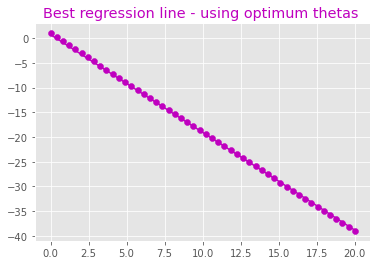

In [27]:
plt.scatter(x,y,c='m')
plt.plot(x,h,c="m")
plt.title("Best regression line - using optimum thetas " ,c = "m")

# ADAM

In [28]:
def adam (x,y,alpha,epslon,max_iteration,beta1,beta2):
    theta0=0
    theta1=0
    v0=0
    v1=0
    m0=0
    m1=0
    m=len(y)
    theta0_all=[]
    theta1_all=[]
    allhypothes = []
    loss=[]
    for i in range (max_iteration):
        h = theta0 + theta1 *x
        allhypothes.append(h)
        cost = (1/(2*m)) *np.sum((h-y)**2)
        loss.append(cost)
        
        theta0_all.append(theta0)
        theta1_all.append(theta1)
        gradient_theta0 = (1/m) *np.sum(h-y)
        gradient_theta1 = (1/m) *np.sum((h-y)*x)
        m0 = beta1 *m0 + (1-beta1) * gradient_theta0
        v0 = beta2 *v0 + (gradient_theta0**2)
        m1 = beta1 *m1 + (1-beta1) * gradient_theta1
        v1 = beta2 *v1 + (gradient_theta1**2)
        theta0 =theta0 - (alpha  / ( np.sqrt(v0) +epslon) * m0)
        theta1 =theta1- (alpha  /  ( np.sqrt(v1) +epslon) * m1)
        
        if  (gradient_theta0**2 + gradient_theta1**2 )**0.5 < 0.1 :
            print(f"  it tooks  {i+1} iterations ")
            break
    return       theta0 ,theta1 ,theta0_all ,theta1_all ,allhypothes,h ,loss ,beta

In [29]:
theta0 ,theta1 ,theta0_all ,theta1_all ,allhypothes,h ,loss ,beta =  adam (x,y,0.3,1e-8,350, 0.1,0.9)

  it tooks  89 iterations 


In [30]:
r2 = r2_score(h,y)
r2

0.9998179571500271

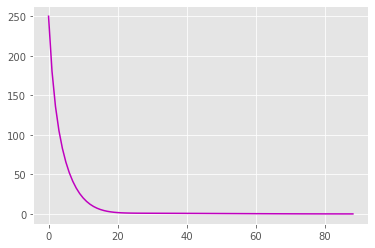

In [31]:
plt.plot(loss,c='m')
plt.show(); 

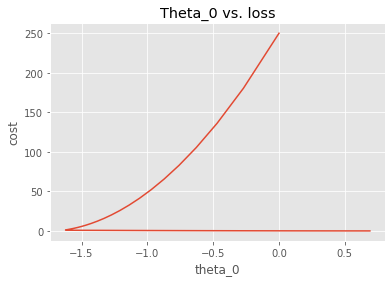

In [32]:
plt.plot(theta0_all, loss)
plt.xlabel('theta_0')
plt.ylabel('cost')
plt.title('Theta_0 vs. loss')
plt.show()

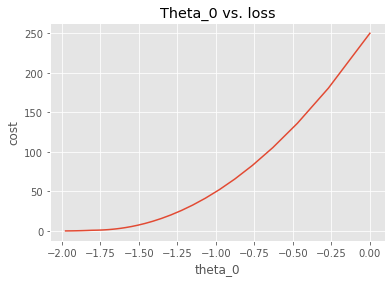

In [33]:
plt.plot(theta1_all, loss)
plt.xlabel('theta_0')
plt.ylabel('cost')
plt.title('Theta_0 vs. loss')
plt.show()

# momentum

In [99]:
def GD_MOMENTUM (x,y,alpha,gama,max_iteration):
    theta0=0
    theta1=0
    v0=0
    v1=0
    m=len(y)
    theta0_all=[]
    theta1_all=[]
    allhypothes = []
    loss=[]
    for i in range (max_iteration):
        h = theta0 + theta1 * x
        allhypothes.append(h)
        cost = ( 1/( 2*m ) ) *  np.sum(  (h - y ) **2 )
        loss.append(cost)
        

        gradient_theta0 = (1/m) *np.sum(h-y)
        gradient_theta1 = (1/m) *np.sum((h-y)*x)
        v0 = v0 * gama +alpha*gradient_theta0
        v1 = v1 * gama +alpha*gradient_theta1
        theta0 =theta0 -v0
        theta1 =theta1- v1
        theta0_all.append(theta0)
        theta1_all.append(theta1)
        
        if (gradient_theta0**2 + gradient_theta1**2  )**0.5 < 0.1:
            print(f" stoped after  {i} iterations ")
            break
            
    return   theta0_all ,theta1_all ,allhypothes ,loss 
   

In [35]:
theta0_all ,theta1_all ,allhypothes ,loss = GD_MOMENTUM (x,y, alpha=0.01, gama = 0.7 , max_iteration = 1000)
print(allhypothes[-1])
r2=r2_score(y,allhypothes[-1])
print("___________________")
print(r2)
print("___________________")
print(y)

 stoped after  126 iterations 
[  0.61275557  -0.19181392  -0.99638341  -1.8009529   -2.6055224
  -3.41009189  -4.21466138  -5.01923087  -5.82380036  -6.62836985
  -7.43293935  -8.23750884  -9.04207833  -9.84664782 -10.65121731
 -11.4557868  -12.26035629 -13.06492579 -13.86949528 -14.67406477
 -15.47863426 -16.28320375 -17.08777324 -17.89234273 -18.69691223
 -19.50148172 -20.30605121 -21.1106207  -21.91519019 -22.71975968
 -23.52432917 -24.32889867 -25.13346816 -25.93803765 -26.74260714
 -27.54717663 -28.35174612 -29.15631562 -29.96088511 -30.7654546
 -31.57002409 -32.37459358 -33.17916307 -33.98373256 -34.78830206
 -35.59287155 -36.39744104 -37.20201053 -38.00658002 -38.81114951]
___________________
0.9997216654894242
___________________
[  1.           0.18367347  -0.63265306  -1.44897959  -2.26530612
  -3.08163265  -3.89795918  -4.71428571  -5.53061224  -6.34693878
  -7.16326531  -7.97959184  -8.79591837  -9.6122449  -10.42857143
 -11.24489796 -12.06122449 -12.87755102 -13.69387755 

In [36]:
r2=r2_score(y,h)
print(r2)

0.9998221809312442


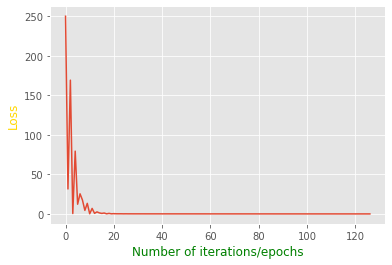

In [37]:
plt.plot(loss)
plt.xlabel("Number of iterations/epochs" , color = 'green')
plt.ylabel("Loss" , color = 'gold');

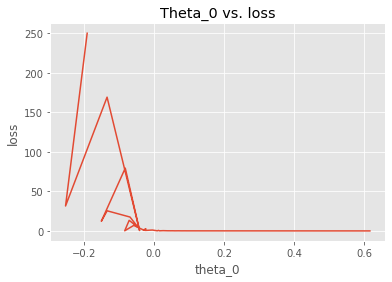

In [38]:
plt.plot(theta0_all, loss)
plt.xlabel('theta_0')
plt.ylabel('loss')
plt.title('Theta_0 vs. loss')
plt.show()

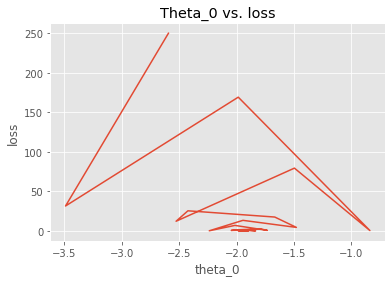

In [39]:
plt.plot(theta1_all, loss)
plt.xlabel('theta_0')
plt.ylabel('loss')
plt.title('Theta_0 vs. loss')
plt.show()

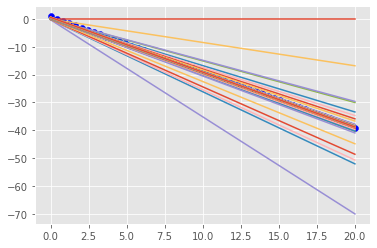

In [40]:
plt.scatter(x,y,color="blue")
for i in  allhypothes:
    plt.plot(x,i)

plt.show()

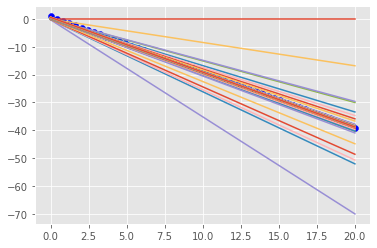

In [41]:
for i in range(len(allhypothes)):
    plt.plot(x,allhypothes[i])
plt.scatter(x,y,color="blue")
plt.show()

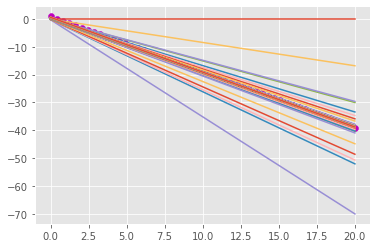

In [42]:
plt.scatter(x,y,c="m")
for i in allhypothes:
    plt.plot(x,i)
plt.show();    

In [43]:
theta0_all ,theta1_all ,allhypothes ,loss = GD_MOMENTUM (x,y, alpha=0.01, gama = 0.9 , max_iteration = 1000)
r2 =r2_score(y,allhypothes[-1])
print(r2)

 stoped after  99 iterations 
0.9999963644806483


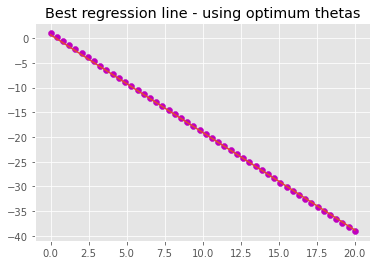

In [44]:
plt.scatter(x,y,color="m")
plt.plot(x,h)
plt.title('Best regression line - using optimum thetas')
plt.show()

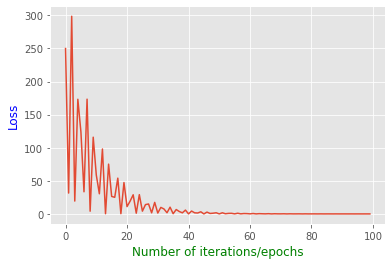

In [45]:
plt.plot(loss)
plt.xlabel("Number of iterations/epochs" , color = 'green')
plt.ylabel("Loss" , color = 'b');

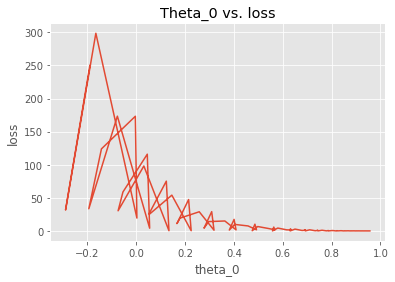

In [46]:
plt.plot(theta0_all, loss)
plt.xlabel('theta_0')
plt.ylabel('loss')
plt.title('Theta_0 vs. loss')
plt.show()

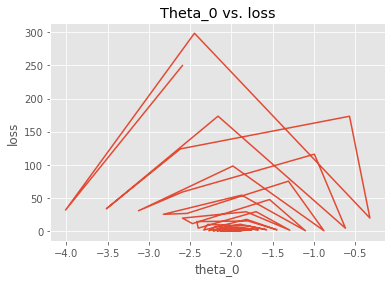

In [47]:
plt.plot(theta1_all, loss)
plt.xlabel('theta_0')
plt.ylabel('loss')
plt.title('Theta_0 vs. loss')
plt.show()

In [48]:
theta0_all ,theta1_all ,allhypothes ,loss = GD_MOMENTUM (x,y, alpha=0.01, gama = 0.5 , max_iteration = 1000)
r2 =r2_score(y,allhypothes[-1])
print(r2)

 stoped after  210 iterations 
0.999720076619046


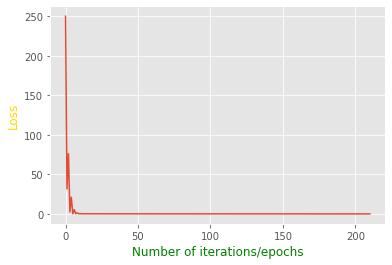

In [49]:
plt.plot(loss)
plt.xlabel("Number of iterations/epochs" , color = 'green')
plt.ylabel("Loss" , color = 'gold');

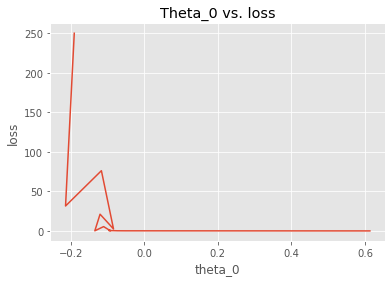

In [50]:
plt.plot(theta0_all, loss)
plt.xlabel('theta_0')
plt.ylabel('loss')
plt.title('Theta_0 vs. loss')
plt.show()

In [51]:
theta0_all ,theta1_all ,allhypothes ,loss = GD_MOMENTUM (x,y, alpha=0.01, gama = 10e-5 , max_iteration = 1000)
r2 =r2_score(y,allhypothes[-1])
print(r2)

 stoped after  420 iterations 
0.9997191455881768


# NAG

In [52]:
def GD_NAG( x, y , alpha ,gamma, max_iteration):
    
    theta0_all = []
    theta1_all = []
    loss = []
    allhypothes = []
    theta0 = 0
    theta1 = 0
    v0 = 0
    v1 = 0
    
  
    for i in range(max_iteration):
        h = theta0 + theta1 * x
        allhypothes.append(h)
        m = len(x)
        cost = (1/(2*m)) * np.sum( (h - y)**2 )

        loss.append(cost)
        theta0_temp = theta0 - gamma*v0
        theta1_temp = theta1 - gamma*v1

        h_temp = theta0_temp + theta1_temp * x
    
        gradient_theta_temp_0 = (1/m) * np.sum( h_temp - y) 

        gradient_theta_temp_1 = (1/m) * np.sum( (h_temp - y) * x )
    
    


        theta0 = theta0_temp - alpha * gradient_theta_temp_0
        theta1 = theta1_temp - alpha * gradient_theta_temp_1

        v0 = gamma * v0 + alpha * gradient_theta_temp_0
        v1 = gamma * v1 + alpha * gradient_theta_temp_1

        theta0_all.append(theta0)
        theta1_all.append(theta1)
        if ( gradient_theta_temp_0**2 + gradient_theta_temp_1**2 )**0.5 < 0.1:
            print (f'Stopped after {i} itterations')
            break
            
            
                      
    
            

     
            

    return allhypothes , loss , theta0_all ,theta1_all
    
    
   

In [53]:
allhypothes , loss , theta0_all ,theta1_all = GD_NAG(x,y,0.01 , 0.8, 1000)
print(allhypothes[-1])
r2= r2_score (y,h)
print(r2)
print(y)

Stopped after 135 itterations
[ 8.03746973e-01 -6.71363989e-03 -8.17174252e-01 -1.62763487e+00
 -2.43809548e+00 -3.24855609e+00 -4.05901670e+00 -4.86947732e+00
 -5.67993793e+00 -6.49039854e+00 -7.30085915e+00 -8.11131977e+00
 -8.92178038e+00 -9.73224099e+00 -1.05427016e+01 -1.13531622e+01
 -1.21636228e+01 -1.29740834e+01 -1.37845441e+01 -1.45950047e+01
 -1.54054653e+01 -1.62159259e+01 -1.70263865e+01 -1.78368471e+01
 -1.86473077e+01 -1.94577683e+01 -2.02682290e+01 -2.10786896e+01
 -2.18891502e+01 -2.26996108e+01 -2.35100714e+01 -2.43205320e+01
 -2.51309926e+01 -2.59414532e+01 -2.67519139e+01 -2.75623745e+01
 -2.83728351e+01 -2.91832957e+01 -2.99937563e+01 -3.08042169e+01
 -3.16146775e+01 -3.24251381e+01 -3.32355988e+01 -3.40460594e+01
 -3.48565200e+01 -3.56669806e+01 -3.64774412e+01 -3.72879018e+01
 -3.80983624e+01 -3.89088230e+01]
0.9998221809312442
[  1.           0.18367347  -0.63265306  -1.44897959  -2.26530612
  -3.08163265  -3.89795918  -4.71428571  -5.53061224  -6.34693878
  -7.

In [54]:
print(f" optimum theta_0 is :  { theta0_all[-1]}") 
print(f" optimum theta_1 is :  { theta1_all[-1]}")

 optimum theta_0 is :  0.8064083678259643
 optimum theta_1 is :  -1.9853870214861264


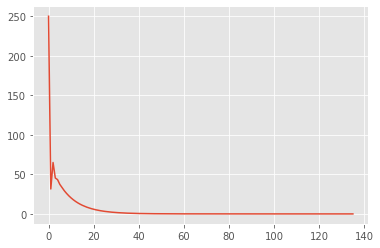

In [55]:
plt.plot(loss)
plt.show();

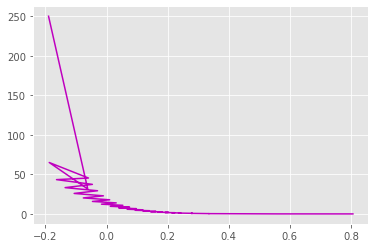

In [56]:
plt.plot(theta0_all,loss ,c='m')


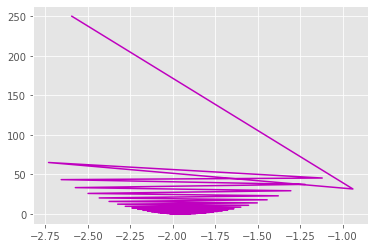

In [57]:
plt.plot(theta1_all,loss ,c='m')

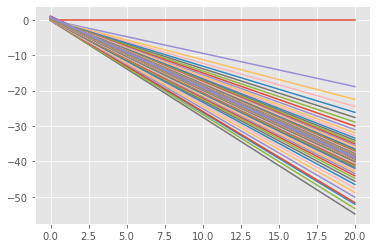

In [58]:
plt.plot(x,y,c='m')
for i in allhypothes:
    plt.plot(x,i)
plt.show();    

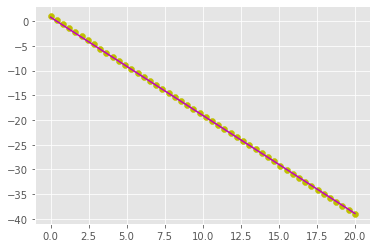

In [59]:
plt.scatter(x,y, c= 'y')
plt.plot(x,allhypothes[-1] , c='m')
plt.show();

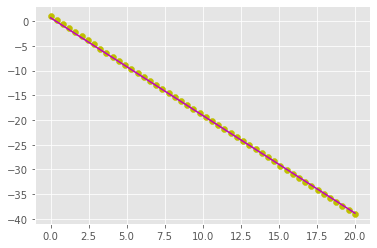

In [60]:
plt.scatter(x,y, c= 'y')
plt.plot(x,h , c='m')
plt.show();

In [82]:
def Mini_Batch(x,start,batch_size):
    return x[start:start+batch_size,:]

# mini batch

In [83]:
Mini_Batch(x,0,10)

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [84]:
x.shape

(50,)

In [73]:
def GD_Mini_Batch( x , y , alpha , itterations, b ):
    theta0 = 0
    theta1 = 0
    theta0_all = []
    theta1_all = []
    loss = []
    allhypothes = []
    
    m = len(x)

    for i in range(itterations):
#X is a matrix with len(X)/batches rows
        for j in range(0 ,  b):
            x_mini = x[j * b : (j + 1) * b ]
            y_mini = y[j * b : (j + 1) * b ]

            h = theta0 + theta1 * x_mini
            m = len(x)
            cost = (1/2*b) * np.sum( (h - y_mini) **2 )
            gradient_theta0 = (1/m) * np.sum( h - y_mini ) 
            gradient_theta1 = (1/m) * np.sum( (h - y_mini) * x_mini )
            
            
            
            

        theta0 = theta0 - alpha * gradient_theta0
        theta1 = theta1 - alpha * gradient_theta1
        theta0_all.append(theta0)
        theta1_all.append(theta1)
        loss.append(cost)
        allhypothes.append(h)
      
    return theta0_all ,theta1_all,loss,allhypothes 


In [74]:
allhypothes , loss , theta0_all ,theta1_all =GD_Mini_Batch( x , y , 0.005 , 100 , 7)

Stopped after 22 itterations 


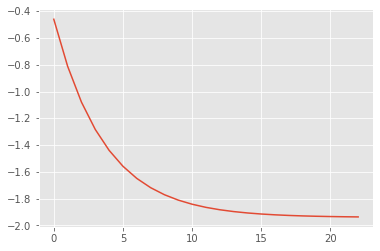

In [75]:
plt.plot(loss);

# Stocastic

In [64]:
def GD_Stochastic( x , y , alpha ,max_iterations):
    theta0_all = []
    theta1_all = []
    loss = []
    allhypothes = []
    theta0 = 0
    theta1 = 0
    m = len(x)
  
    for i in range (max_iterations):
        
        
        for j in range(len(x)):
            
        
            h = theta0 + theta1 * x[j]
            allhypothes.append(h)
            gradient_theta0 =   h - y
            gradient_theta1 =  (h - y) * x[j] 
            theta0 = theta0 - alpha * gradient_theta0
            theta1 = theta1 - alpha * gradient_theta1 
        
    
      
    
        cost = (1/2) *  (h - y)**2 
        loss.append(np.sum(cost))
        theta0_all.append(theta0)
        theta1_all.append(theta1)
  

    return allhypothes , loss , theta0_all ,theta1_all

In [65]:
allhypothes , loss , theta0_all ,theta1_all =GD_Stochastic( x, y , 0.001 , 50)

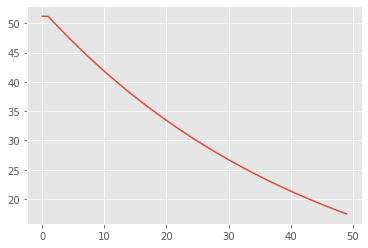

In [66]:
plt.plot(loss);

# batch

In [67]:
def Batch( x , y , alpha , max_iterations):
    theta0 = 0
    theta1 = 0
    theta0_all = []
    theta1_all = []
    loss = []
    allhypothes = []
    
    m = len(x)

    for i in range(max_iterations):
        h = theta0 + theta1 * x
        allhypothes.append(h)
        cost = (1/(2*m)) *np.sum(np.square(h-y))
        loss.append(cost)       
        theta0_all.append(theta0)
        theta1_all.append(theta1)
        gradient_theta0 = (1/m) *np.sum(h-y)
        gradient_theta1 = (1/m) *np.sum((h-y)*x)
        theta0 = theta0 - alpha * gradient_theta0
        theta1 = theta1 - alpha * gradient_theta1


        if (gradient_theta0**2 + gradient_theta1**2)**0.5  < 0.25:
            print(f"Stopped after {i} itterations ")
            break
    

    return theta0_all ,theta1_all,loss,allhypothes 

In [68]:
theta0_all ,theta1_all,loss,allhypothes =  Batch(x,y,.001,1000)

Stopped after 626 itterations 


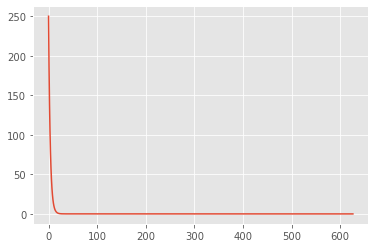

In [69]:
plt.plot(loss);